<a href="https://colab.research.google.com/github/zulfahnh/Java_8_Basic_Programming/blob/main/Eksplorasi_dan_Analisis_Data_COVID_19_Indonesia_using_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19** merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

In [ ]:
bersatulawancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(bersatulawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


Dalam proyek ini, Anda akan diminta untuk melakukan eksplorasi dan analisis mengenai COVID-19 di Indonesia. Data yang Anda pergunakan diambil langsung dari API (Application Programming Interface) yang tersedia di covid19.go.id. Sehingga dalam proyek ini Anda akan mempelajari teknik mengambil data dari API, teknik mempersiapkan data, serta analisis dan visualisasi data.

info restAPI https://restfulapi.net/http-status-codes/

**Mengakses API covid19.go.id**

In [ ]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

print(resp)
print(resp.headers)

<Response [200]>
{'Server': 'nginx', 'Date': 'Mon, 18 Jan 2021 14:07:49 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 18 Jan 2021 14:04:31 GMT', 'ETag': 'W/"6005956f-1e3df"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


**Mengekstrak Isi Respon**

In [ ]:
cov_id_raw = resp.json()
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


**Analisa Data**

Sekarang fokus pada obyek **cov_id_update** untuk menjawab pertanyaan-pertanyaan berikut:

Kapan tanggal pembaharuan data penambahan kasus?
Berapa jumlah penambahan kasus sembuh?
Berapa jumlah penambahan kasus meninggal?
Berapa jumlah total kasus positif hingga saat ini?
Berapa jumlah total kasus meninggal hingga saat ini?

In [ ]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-01-18
Jumlah penambahan kasus sembuh : 9475
Jumlah penambahan kasus meninggal : 295
Jumlah total kasus positif hingga saat ini : 917015
Jumlah total kasus meninggal hingga saat ini: 26282


#**Apa Kabar Jawa Barat?**

In [ ]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()


**Memahami Kasus COVID-19 di Jawa Barat**

mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

Berapa jumlah total kasus COVID-19 di Jawa Barat?
Berapa persentase kematian akibat COVID-19 di Jawa Barat?
Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?

In [ ]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 112587
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.199961.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 80.892998.2%


In [18]:
import numpy as np
import pandas as pd
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       322 non-null    int64
 1   KASUS                         322 non-null    int64
 2   MENINGGAL                     322 non-null    int64
 3   SEMBUH                        322 non-null    int64
 4   DIRAWAT_OR_ISOLASI            322 non-null    int64
 5   AKUMULASI_KASUS               322 non-null    int64
 6   AKUMULASI_SEMBUH              322 non-null    int64
 7   AKUMULASI_MENINGGAL           322 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  322 non-null    int64
dtypes: int64(9)
memory usage: 22.8 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583107200000      3  ...                    0                             3
1  1583193600000 

- Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
- Merubah format penulisan semua kolom menjadi huruf kecil
- Mengganti nama kolom kasus menjadi kasus_baru
- Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

In [19]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0


## **Visualisasi Data Covid-19**

<Figure size 432x288 with 0 Axes>

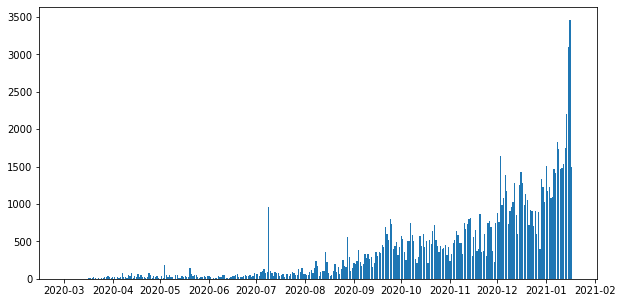

In [20]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

**Kasus Positif Setiap Hari**

<Figure size 432x288 with 0 Axes>

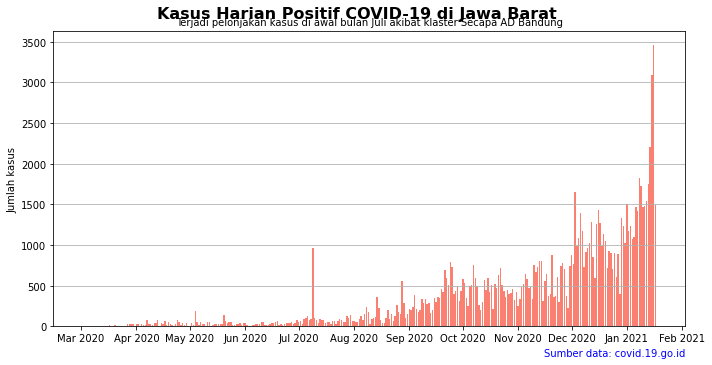

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Data Kesembuhan COVID-19**

<Figure size 432x288 with 0 Axes>

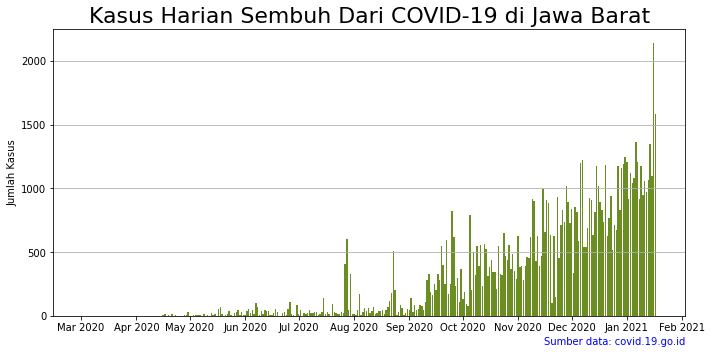

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Kasus Meninggal**

<Figure size 432x288 with 0 Axes>

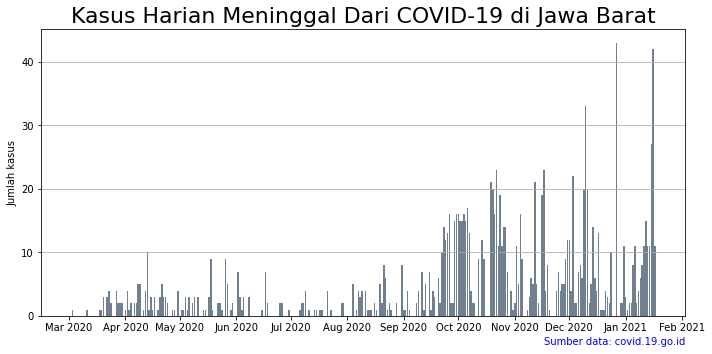

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **Apakah Pekan ini Lebih Baik?**

In [25]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     46 non-null     int64
 1   pekan_ke  46 non-null     int64
 2   jumlah    46 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       7
1   2020        11       5
2   2020        12      52
3   2020        13     104
4   2020        14     122


## **Apakah Pekan ini Lebih Baik dari Pekan Lalu?**

In [26]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       7                 0       False
1   2020        11       5                 7        True
2   2020        12      52                 5       False
3   2020        13     104                52       False
4   2020        14     122               104       False
5   2020        15     235               122       False
6   2020        16     277               235       False
7   2020        17     216               277        True
8   2020        18     156               216        True
9   2020        19     367               156       False


## **Visualisasi Data**

<Figure size 432x288 with 0 Axes>

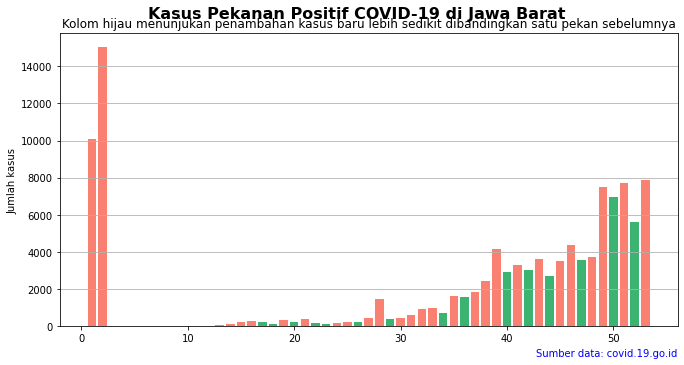

In [27]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_pekanan, x='pekan_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()				

**Perhitungan**

In [28]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
317,2021-01-13,16220,84860,1251
318,2021-01-14,17061,86209,1262
319,2021-01-15,19034,87304,1289
320,2021-01-16,20309,89447,1331
321,2021-01-17,20207,91029,1342


**Kasus Positif Aktif**

<Figure size 432x288 with 0 Axes>

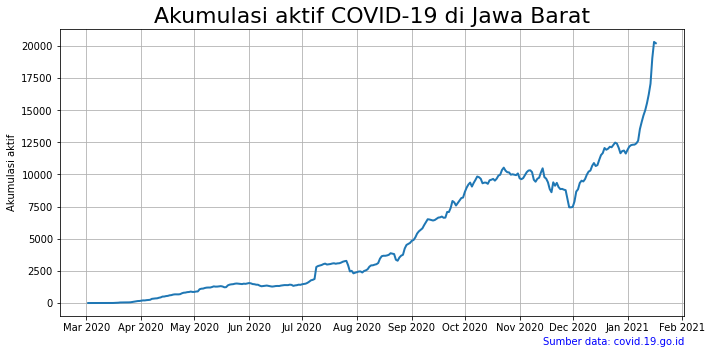

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

**Visualisasi Data Kasus Aktif, Kasus Sembuh, dan Kasus Meninggal**

<Figure size 432x288 with 0 Axes>

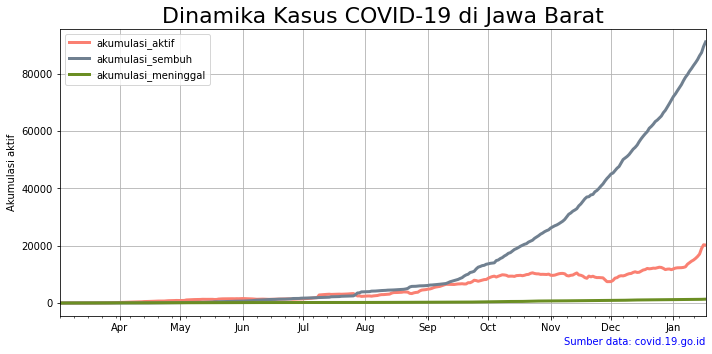

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon','slategrey','olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()